# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables? 
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
#%matplotlib inline     
sns.set(color_codes=True)
import seaborn.objects as so
from pathlib import Path
import plotly.express as px
import missingno as msno

In [97]:
df = pd.read_csv("diabetes.csv")
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [98]:
#  check if there  is any missing values in dataframe as a whole
df.isnull()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1                       False  False    False  
2                       False  False    False  
3                       False  False    False  
4                       False  False    False  
..                        ...    ...      ...  
763                     False  False    False  
764                     False  False    False  
765                     False  False    False  
766                     False  False    False  
767                     False  False    False  

[768 rows x 9 columns]

In [10]:
# Check is there any missing values across each column
df.isnull().any()
# So we can see that in this data set not any missing value

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [11]:
# Count of missing values of each column
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
df.describe() #summary statistics

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

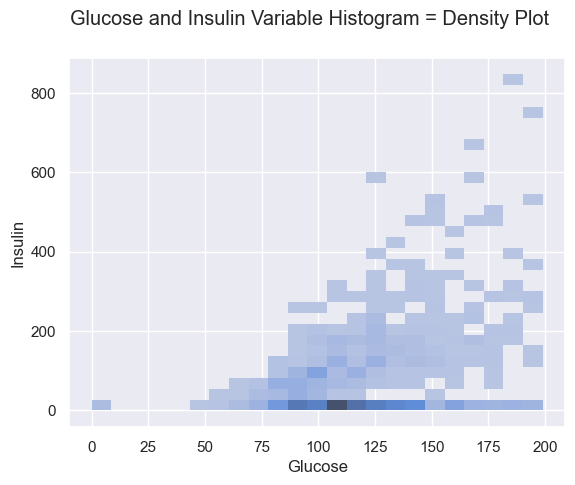

In [15]:
#Relation between variables
sns.histplot(data=df, 
             x="Glucose", 
             y="Insulin")

plt.suptitle("Glucose and Insulin Variable Histogram = Density Plot")

plt.show()

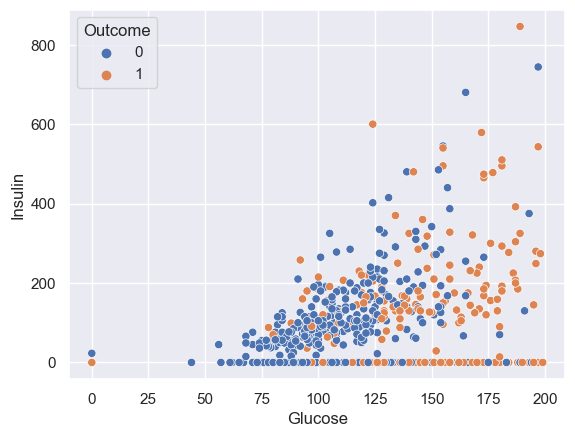

In [16]:
# correation between Glucose and Insulin with outcome

sns.scatterplot(data=df, x='Glucose', y='Insulin', hue='Outcome')
plt.show()

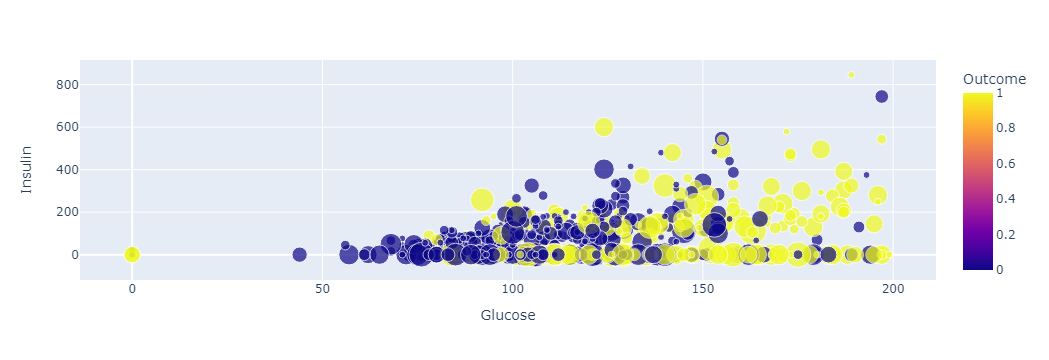

In [17]:
# correation between all predicated variable with outcome
fig = px.scatter(df, x='Glucose', y='Insulin', color='Outcome', size='Pregnancies', hover_data=['BMI'])
fig.show()

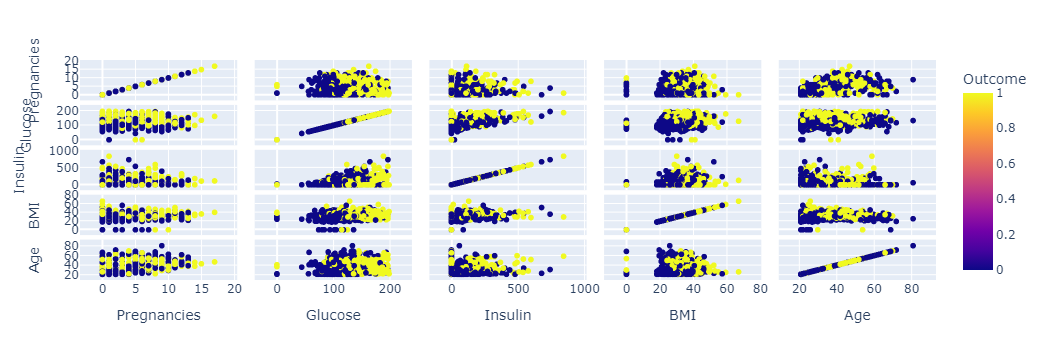

In [18]:
fig = px.scatter_matrix(df,
                        dimensions=['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age'],
                        hover_data=['BloodPressure', 'SkinThickness'],
                        color="Outcome")
fig.show()

In [25]:
# the distribution of each predictor variable
df_columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']

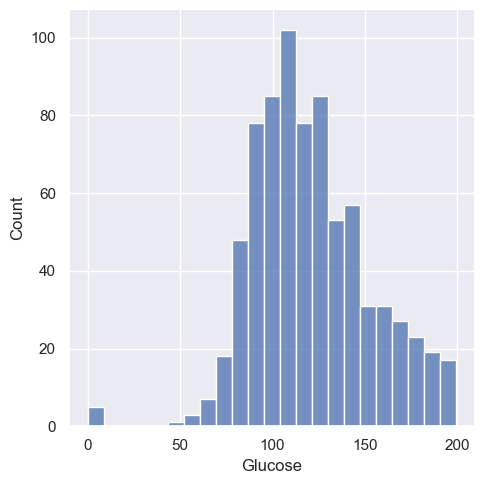

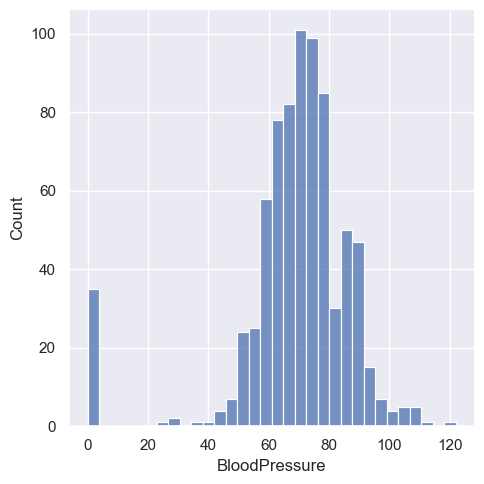

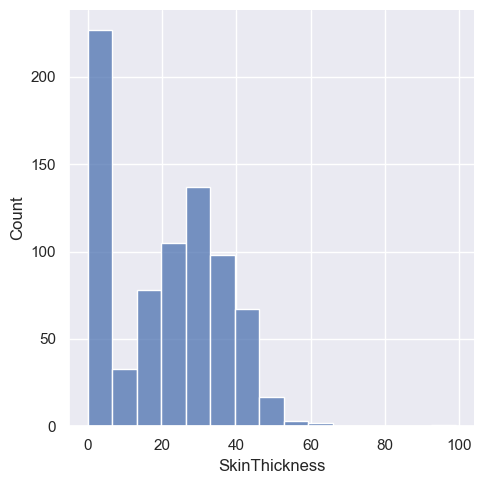

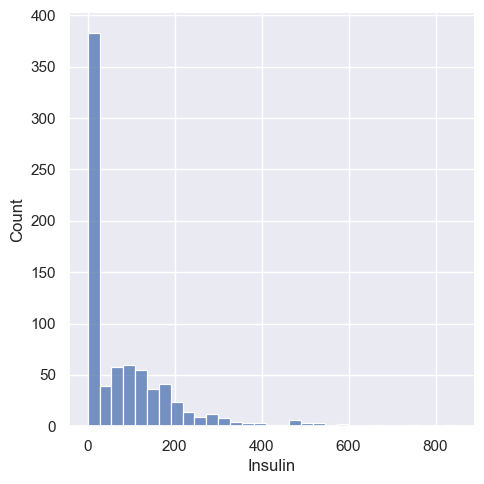

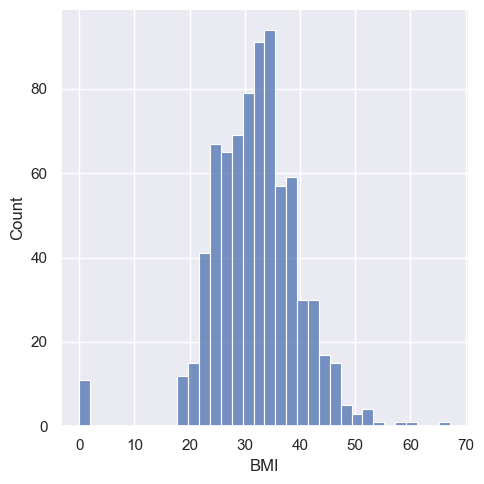

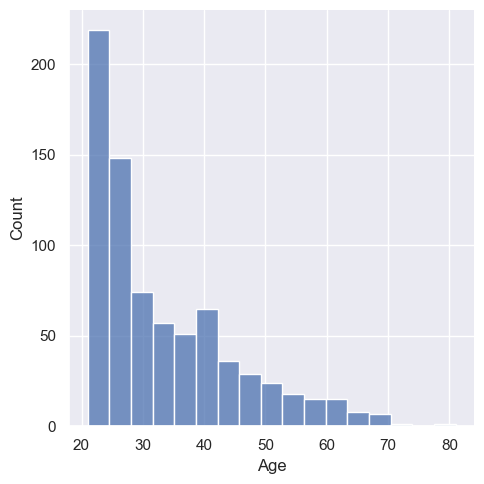

In [26]:
for column in df_columns:
    sns.displot(df[column])

<AxesSubplot:xlabel='BMI', ylabel='Count'>

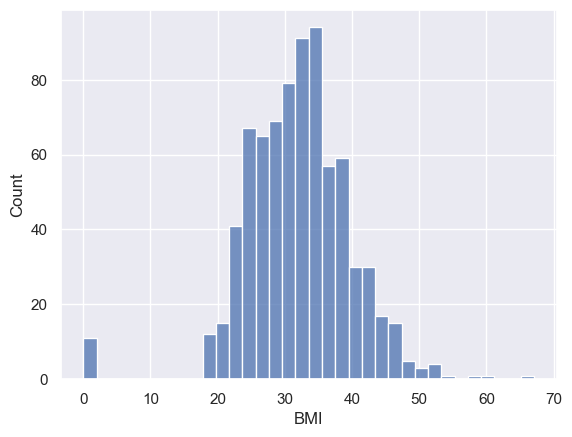

In [27]:
#Outliners
sns.histplot(x=df['BMI'])


<AxesSubplot:xlabel='Insulin', ylabel='Count'>

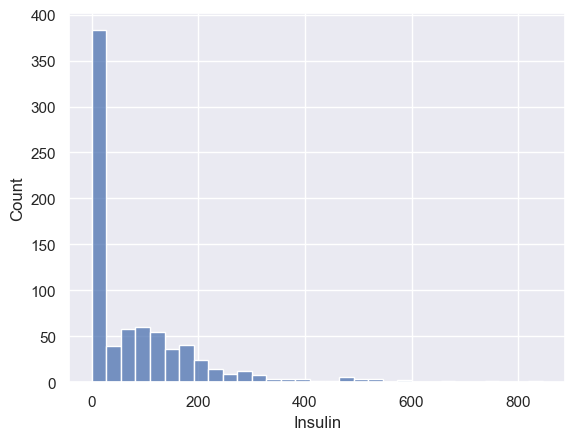

In [28]:
sns.histplot(x=df['Insulin'])

<AxesSubplot:xlabel='BMI', ylabel='SkinThickness'>

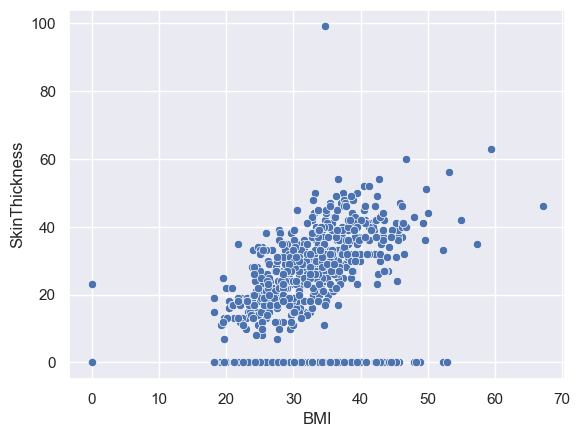

In [29]:
sns.scatterplot(data=df, x='BMI', y='SkinThickness')

<AxesSubplot:xlabel='Glucose'>

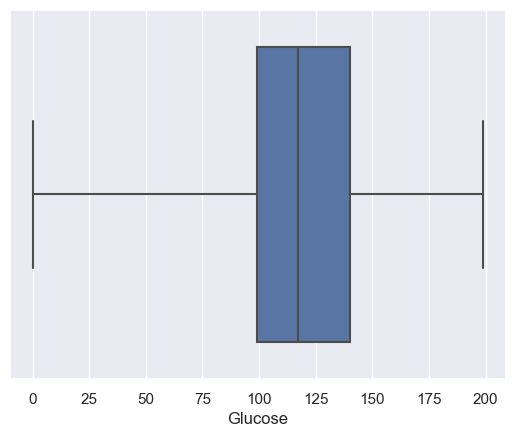

In [30]:
# sns.boxplot(x=diabetes_df['Glucose'])
sns.boxplot(x=df['Glucose'], whis=4)

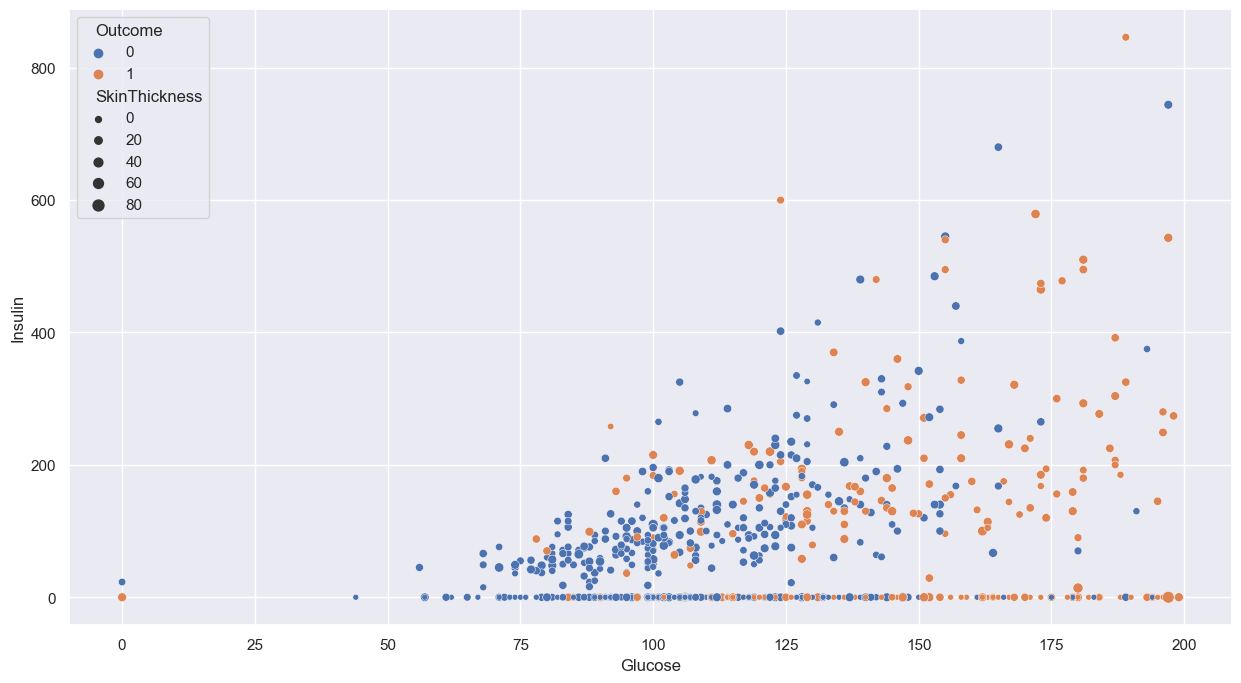

In [31]:

plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='Glucose', y='Insulin', hue='Outcome', size='SkinThickness')

plt.show()


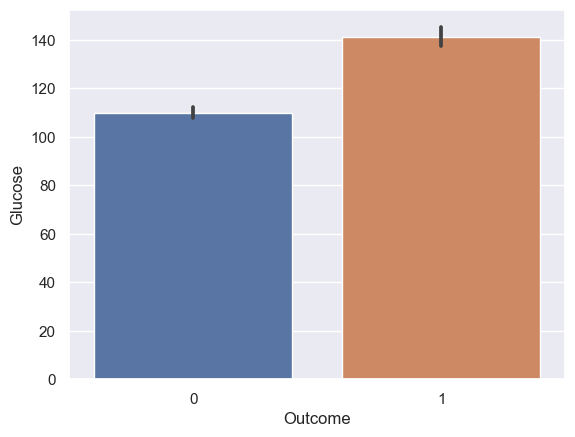

In [32]:
# avarage
plt.figure(figsize=(6.4,4.8)) #default size
sns.barplot(data=df, x='Outcome', y='Glucose') #averages with bars

plt.show()

C:\Users\14312\anaconda3\envs\test_env\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\14312\anaconda3\envs\test_env\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



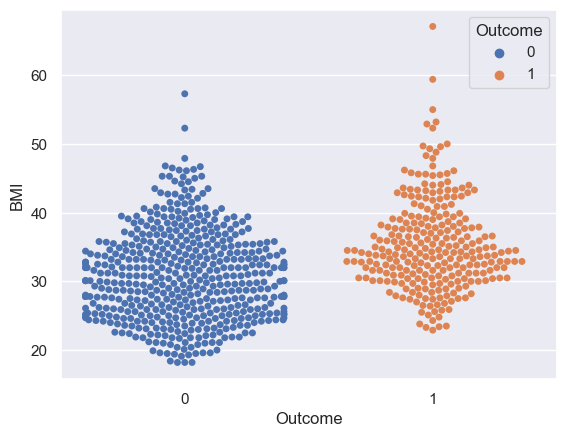

In [107]:
sns.swarmplot(data=df, x='Outcome', y='BMI' , hue = 'Outcome')
# sns.stripplot(data=diabetes_df, x='Outcome', y='BMI')

plt.show()

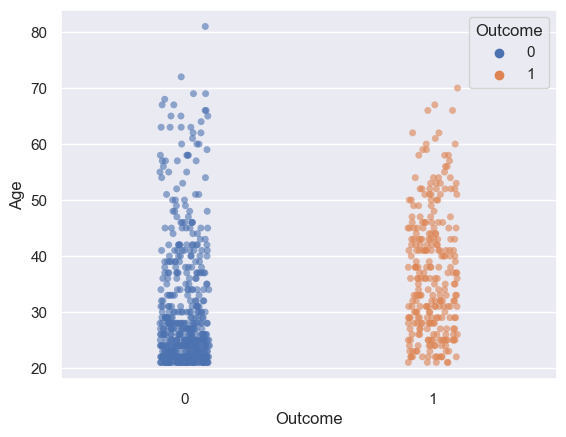

In [163]:
sns.stripplot(data=df, x='Outcome', y='Age',hue = 'Outcome', alpha=0.6)
plt.show()

# categorical scatterplot using jitter to reduce overplotting

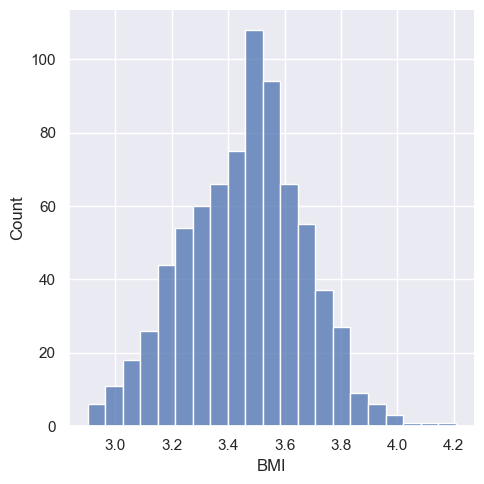

In [111]:
# log transformation
logBMI = df["BMI"].apply(np.log)
sns.displot(logBMI)

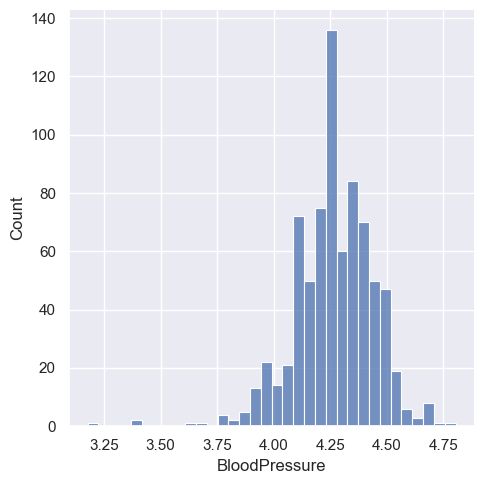

In [112]:
# log transformation
logBloodPressure = df["BloodPressure"].apply(np.log)
sns.displot(logBloodPressure)

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [114]:
df.shape #number of rows and columns

(768, 11)

In [115]:
#missing values
def missing(x):
    n_missing = x.isnull().sum().sort_values(ascending=False)
    p_missing = (x.isnull().sum()/x.isnull().count()).sort_values(ascending=False)
    missing_ = pd.concat([n_missing, p_missing],axis=1, keys = ['number','percent'])
    return missing_
missing(df)


number  percent
Pregnancies                    0      0.0
Glucose                        0      0.0
BloodPressure                  0      0.0
SkinThickness                  0      0.0
Insulin                        0      0.0
BMI                            0      0.0
DiabetesPedigreeFunction       0      0.0
Age                            0      0.0
Outcome                        0      0.0
logBloodPressure               0      0.0
logBMI                         0      0.0

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   logBloodPressure          768 non-null    float64
 10  logBMI                    768 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 66.1 KB


In [117]:
(df['Insulin']==0).sum() #check how  many zeros there are in each column

for column_name in df.columns:
    count = (df[column_name] == 0).sum()
    print('Num zeros in column', column_name, 'is:', count)

Num zeros in column Pregnancies is: 0
Num zeros in column Glucose is: 0
Num zeros in column BloodPressure is: 0
Num zeros in column SkinThickness is: 0
Num zeros in column Insulin is: 0
Num zeros in column BMI is: 0
Num zeros in column DiabetesPedigreeFunction is: 0
Num zeros in column Age is: 0
Num zeros in column Outcome is: 500
Num zeros in column logBloodPressure is: 0
Num zeros in column logBMI is: 0


In [118]:
#Replace 0 with Mean values
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Pregnancies'] = df['Pregnancies'].replace(0,df['Pregnancies'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())



In [119]:

for column_name in df.columns:
    count = (df[column_name] == 0).sum()
    print('Num zeros in column', column_name, 'is:', count)

Num zeros in column Pregnancies is: 0
Num zeros in column Glucose is: 0
Num zeros in column BloodPressure is: 0
Num zeros in column SkinThickness is: 0
Num zeros in column Insulin is: 0
Num zeros in column BMI is: 0
Num zeros in column DiabetesPedigreeFunction is: 0
Num zeros in column Age is: 0
Num zeros in column Outcome is: 500
Num zeros in column logBloodPressure is: 0
Num zeros in column logBMI is: 0


In [120]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      4.400782  121.681605      72.254807      26.606479  118.660163   
std       2.984162   30.436016      12.115932       9.631241   93.080358   
min       1.000000   44.000000      24.000000       7.000000   14.000000   
25%       2.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.845052  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  \
count  768.000000                768.000000  768.000000  768.000000   
mean    32.450805                  0.471876   33.240885    0.348958   
std      6.875374                  0.331329   11.760232    0.476951   
min     18.200000                  0.078000   21.000000    0.000000   
25%     27.500000                  0.243750   24.000000    0.000000   
50%     32.000000                  0.372500   29.000000    0.000000   
75%     36.600000                  0.626250   41.000000    1.000000   
max     67.100000                  2.420000   81.000000    1.000000   

       logBloodPressure      logBMI  
count        768.000000  768.000000  
mean               -inf        -inf  
std                 NaN         NaN  
min                -inf        -inf  
25%            4.127134    3.306887  
50%            4.276666    3.465736  
75%            4.382027    3.600048  
max            4.804021    4.206184

In [122]:
# Scaling
from sklearn.preprocessing import StandardScaler
# 
scaler = StandardScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(df[df_columns]))

In [123]:
df_train_scaled

0         1         2         3         4         5
0    0.865276 -0.021044  0.872057 -0.417768  0.167255  1.425995
1   -1.205989 -0.516583  0.248678 -0.417768 -0.851535 -0.190672
2    2.015979 -0.681762 -0.630654 -0.417768 -1.331821 -0.105584
3   -1.074480 -0.516583 -0.374700 -0.265107 -0.633222 -1.041549
4    0.503626 -2.663916  0.872057  0.530423  1.549899 -0.020496
..        ...       ...       ...       ...       ...       ...
763 -0.679954  0.309315  2.222711  0.659428  0.065376  2.532136
764  0.010468 -0.186224  0.040885 -0.417768  0.632988 -0.531023
765 -0.022409 -0.021044 -0.374700 -0.071599 -0.909751 -0.275760
766  0.141977 -1.012121 -0.630654 -0.417768 -0.342140  1.170732
767 -0.942972 -0.186224  0.456471 -0.417768 -0.298477 -0.871374

[768 rows x 6 columns]

In [124]:
print(df_train_scaled.columns)

RangeIndex(start=0, stop=6, step=1)


In [126]:
df_train_scaled.columns = df_columns
print(df_train_scaled.columns)


Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age'], dtype='object')


In [127]:
df_train_scaled

Glucose  BloodPressure  SkinThickness   Insulin       BMI       Age
0    0.865276      -0.021044       0.872057 -0.417768  0.167255  1.425995
1   -1.205989      -0.516583       0.248678 -0.417768 -0.851535 -0.190672
2    2.015979      -0.681762      -0.630654 -0.417768 -1.331821 -0.105584
3   -1.074480      -0.516583      -0.374700 -0.265107 -0.633222 -1.041549
4    0.503626      -2.663916       0.872057  0.530423  1.549899 -0.020496
..        ...            ...            ...       ...       ...       ...
763 -0.679954       0.309315       2.222711  0.659428  0.065376  2.532136
764  0.010468      -0.186224       0.040885 -0.417768  0.632988 -0.531023
765 -0.022409      -0.021044      -0.374700 -0.071599 -0.909751 -0.275760
766  0.141977      -1.012121      -0.630654 -0.417768 -0.342140  1.170732
767 -0.942972      -0.186224       0.456471 -0.417768 -0.298477 -0.871374

[768 rows x 6 columns]

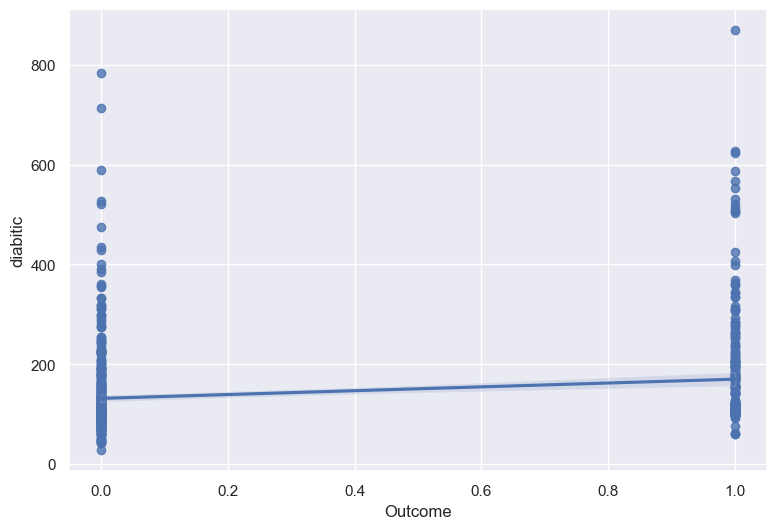

In [128]:
# Feature engineering
df['diabitic'] = df['SkinThickness'] + df['Insulin']


f, ax = plt.subplots(figsize=(9, 6))
# seaborn's regression plot
sns.regplot(x=(df['Outcome']), y=df['diabitic'], data=df, order=1);


In [129]:
import copy

In [130]:
df_copy = copy.deepcopy(df)

col = [
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "BMI",
    "Age"
]

df_copy = df_copy[col]

In [131]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_copy)

df_scale = pd.DataFrame(scaler.transform(df_copy),columns = df_copy.columns)

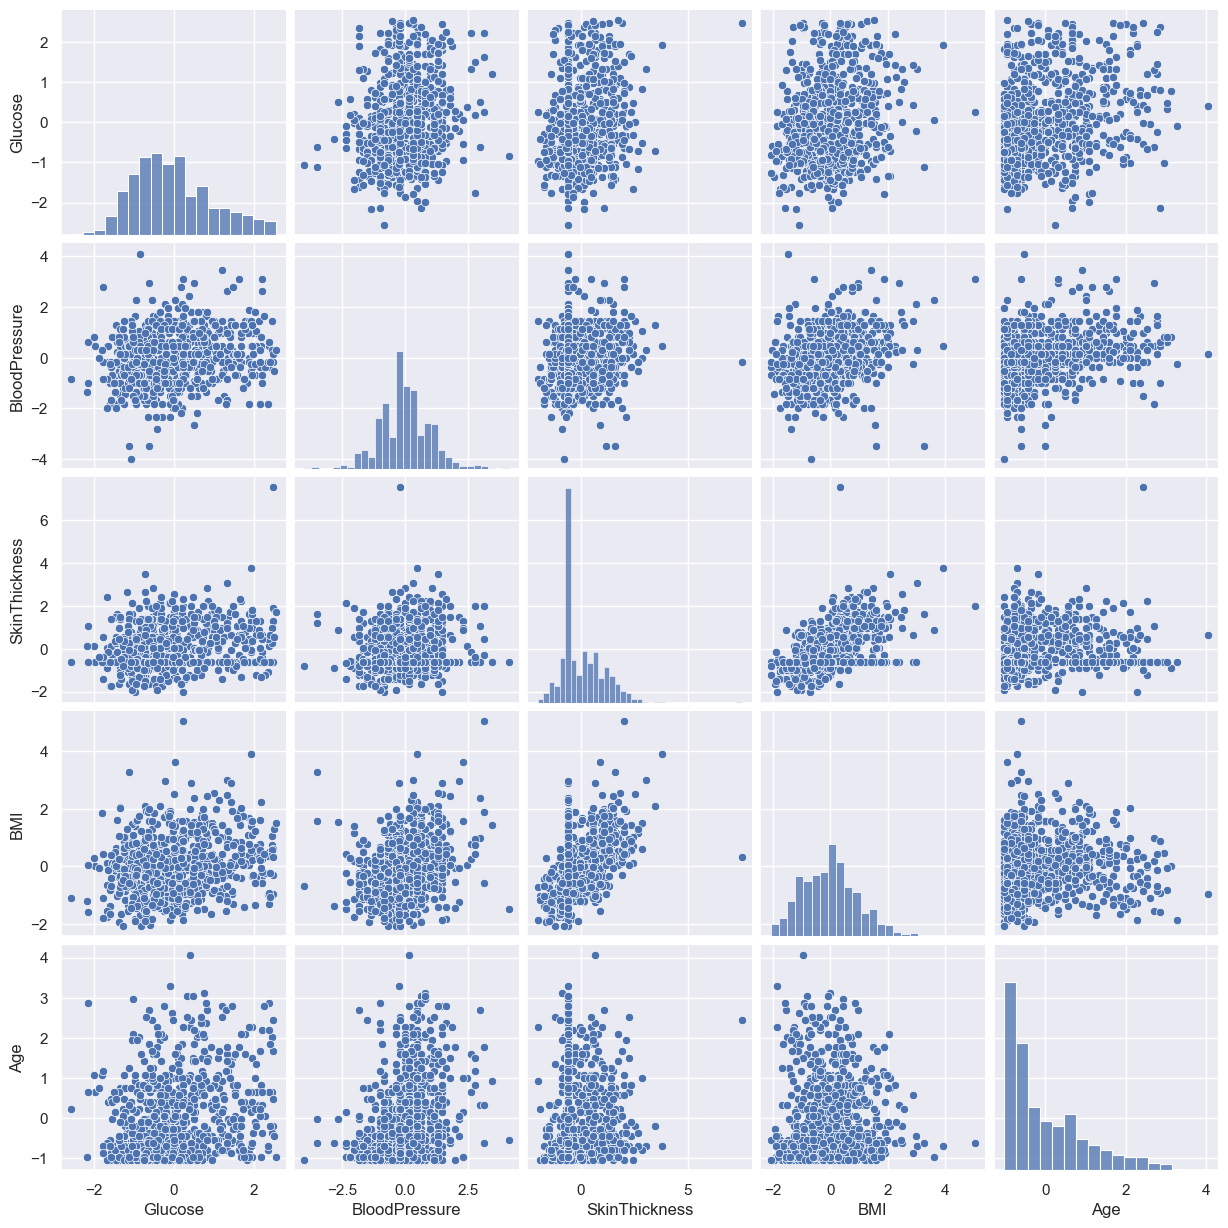

In [132]:
sns.pairplot(df_scale)


In [133]:
from sklearn.preprocessing import Normalizer

n = Normalizer()
n.fit(df_copy)
df_norm = pd.DataFrame(n.transform(df_copy),columns = df_copy.columns)

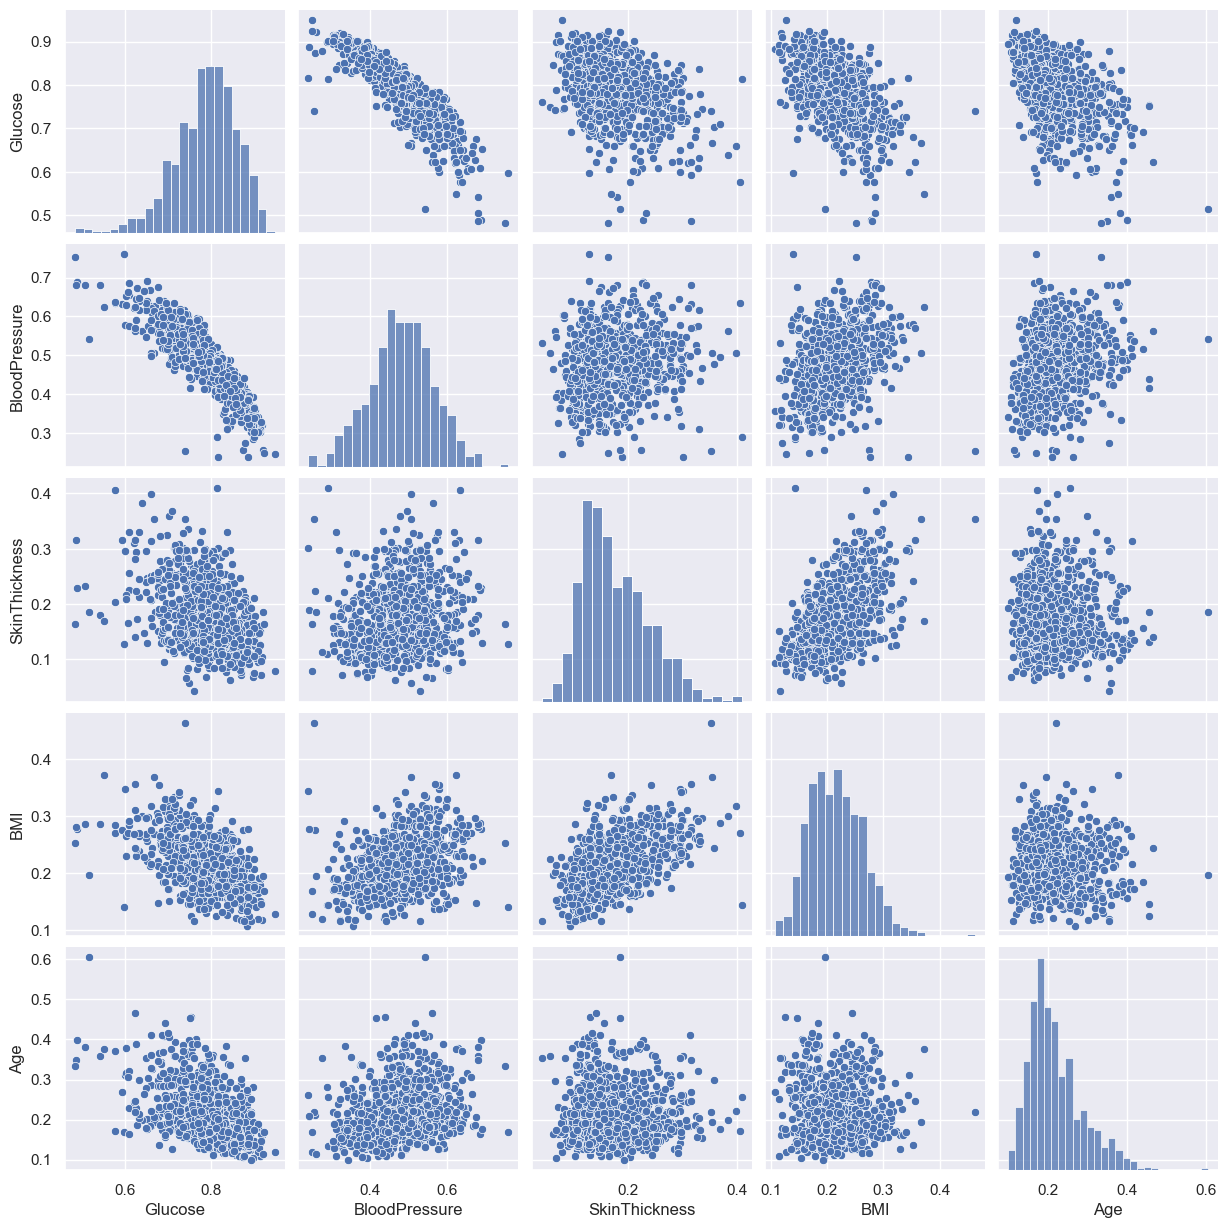

In [134]:
sns.pairplot(df_norm)

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [135]:
# Load the datase
from sklearn.utils import shuffle

X, y = df[col], df['Outcome']

# It is good practice to shuffle your data, since it
# may be ordered in a particular way (e.g. increasing target)
X, y = shuffle(X, y, random_state=27)

print(f'Dataset has {X.shape[0]} data points and {X.shape[1]} features')

Dataset has 768 data points and 5 features


In [136]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

acc_train = log_reg.score(X_train,y_train)
print(f'acc train: {acc_train}')

acc_test = log_reg.score(X_test,y_test)
print(f'acc test: {acc_test}')

acc train: 0.7638436482084691
acc test: 0.7857142857142857


In [140]:
df['predicted_outcome'] = (df.Outcome >= 0).astype('int')
# ground truth
y_true = df.Outcome.values

# simulate probabilites of positive class
y_proba =  df.predicted_outcome.values

# set the threshold to predict positive class
thres = 0.5 

# class predictions
y_pred = [int(value > thres) for value in y_proba]


In [141]:
# import confusion_matrix from sklearn
from sklearn.metrics import confusion_matrix

# compute confusion_matrix
confusion_matrix = confusion_matrix(y_true,y_pred)

print(confusion_matrix)

[[  0 500]
 [  0 268]]


In [142]:
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score

# compute accuracy
accuracy = accuracy_score(y_true,y_pred)

# print accuracy
#print(accuracy)
print('Accuracy Score: %.3f'%(accuracy))

Accuracy Score: 0.349


In [143]:
# import f1_score from sklearn
from sklearn.metrics import f1_score

# compute F1-score
f1_score = f1_score(y_true,y_pred)

# print F1-score
#print(f1_score)
print('F1-Score: %.3f'%(f1_score))

F1-Score: 0.517


In [144]:
# import roc_auc_score from sklearn
from sklearn.metrics import roc_auc_score

# compute AUC-score
auc = roc_auc_score(y_true,y_proba)

# print AUC-score
print('ROC-AUC SCORE: %.2f'%(auc))


ROC-AUC SCORE: 0.50


In [145]:
# import recall_score from sklearn
from sklearn.metrics import recall_score

# compute recall_score
recall_score = recall_score(y_true,y_proba)

# print recall_score
print('RECALL SCORE: %.2f'%(recall_score))


RECALL SCORE: 1.00


In [146]:
# import precision_score from sklearn
from sklearn.metrics import precision_score

# compute precision_score
precision_score = precision_score(y_true,y_proba)

# print precision_score
print('PRECISION SCORE: %.2f'%(precision_score))


PRECISION SCORE: 0.35


In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=0)

In [157]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((614, 5), (154, 5))

In [158]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0) #Descition Tree model


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [152]:
y_pred_gini = clf_gini.predict(X_test) #Prediction

In [153]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7468


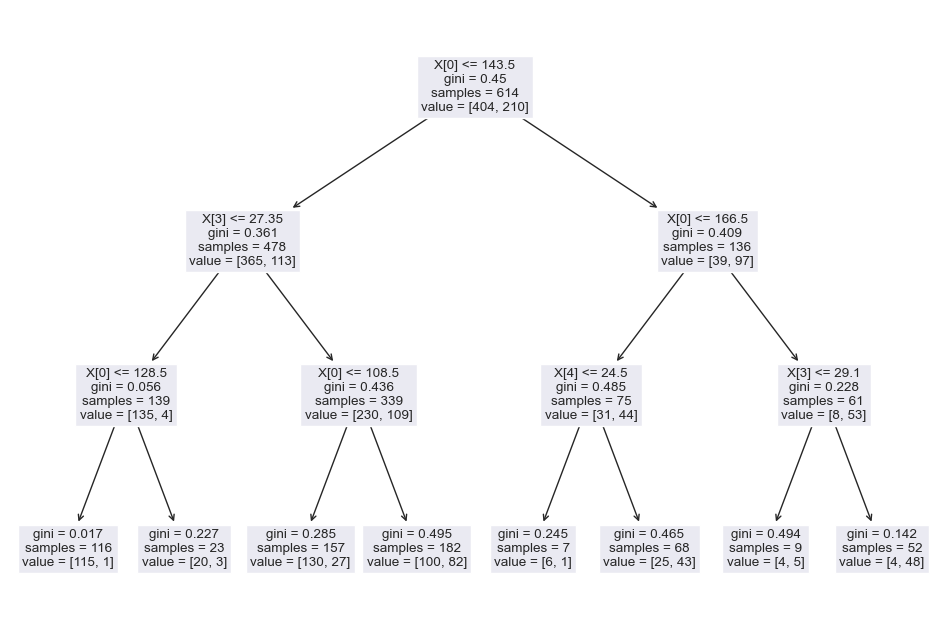

In [154]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) ;

In [155]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

Ensemble Model

In [159]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)
# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7403


In [160]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'.format(accuracy_score(y_test, y_pred_100)))


Model accuracy score with 100 decision-trees : 0.7403


In [161]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[78 18]
 [22 36]]


In [162]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80        96
           1       0.67      0.62      0.64        58

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

## In this project, I built various EDA for data exploration and understanding of datasets. Thus, I found Glucose, BMI, skin Thickness, Blood Presser and age are the most predictable variable.
## I found a person who has a high glucose level and BMI compares to the average level of a person who has diabetes.
## I also created Logistic Regression and Ensemble Random Forest Classifier machine learning model and compares these models I found Ensemble Random Forest Classifier is the best-fit model because the accuracy score is too low for a logistic regression model. 
## The model accuracy score with 10 decision trees is  0.743.
## Confusion matrix and classification report are other tools to visualize the model performance. They yield good performance.
